In [2]:
import numpy as np
import networkx as nx
import random
import warnings
from gensim.models import Word2Vec
warnings.filterwarnings('ignore')
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score
import community as comm

In [27]:

graph_file = 'cora.txt'
labelfile = 'cora.nodes.labels'
graph = nx.read_edgelist(graph_file, nodetype=None)
graph = graph.to_directed()
print("Number of nodes: ", graph.number_of_nodes())
print("Number of edges: ", graph.number_of_edges())


Number of nodes:  2708
Number of edges:  10556


In [ ]:
%run prediction.ipynb

In [7]:

undirected_graph = graph.to_undirected()
# converting node labels to integers for indexing in modularity computation 
undirected_graph = nx.relabel_nodes(undirected_graph, lambda x: int(x)-1)


In [24]:

def perform_shortcut_walks(graph, num_walks, walk_length, p):
    nodes = graph.nodes()
    walks = []
    for _ in range(num_walks):
        for v in nodes:
            walk = [v]
            while len(walk) < walk_length:
                current_node = walk[-1]
                neighbors = list(graph.neighbors(current_node))
                non_neighbors = []
                for n in nodes:
                    if n != current_node and n not in neighbors:
                        non_neighbors.append(n)
                if len(neighbors) > 0 and random.uniform(0, 1) < p:
                    walk.append(random.choice(neighbors))
                elif len(non_neighbors) > 0:
                    walk.append(random.choice(non_neighbors))
                else:
                    break
            walks.append(walk)
    return walks


For p value as  {0.01}
Learning embedding vectors...
Learning embedding vectors done!
Training classifier using 5.00% nodes...
-------------------
{'acc': 0.20590520590520592}
-------------------
Training classifier using 10.00% nodes...
-------------------
{'acc': 0.2346185397867104}
-------------------
Training classifier using 20.00% nodes...
-------------------
{'acc': 0.246309963099631}
-------------------
Training classifier using 30.00% nodes...
-------------------
{'acc': 0.23839662447257384}
-------------------
Training classifier using 40.00% nodes...
-------------------
{'acc': 0.23247232472324722}
-------------------
Training classifier using 50.00% nodes...
-------------------
{'acc': 0.24963072378138848}
-------------------
Training classifier using 60.00% nodes...
-------------------
{'acc': 0.23616236162361623}
-------------------
Training classifier using 70.00% nodes...
-------------------
{'acc': 0.24815724815724816}
-------------------
Training classifier using 80.0

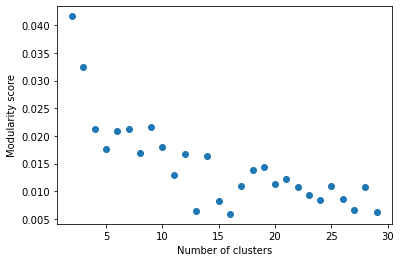

Link predictions: 0.05 :Accuracy: 0.4981553494864892
Link predictions: 0.1 :Accuracy: 0.49847384485843593
Link predictions: 0.2 :Accuracy: 0.5024274718768502
Link predictions: 0.3 :Accuracy: 0.5062246278755075
Link predictions: 0.4 :Accuracy: 0.5036311967161351
Link predictions: 0.5 :Accuracy: 0.5119363395225465
Link predictions: 0.6 :Accuracy: 0.5105375325597916
Link predictions: 0.7 :Accuracy: 0.522576570887275
Link predictions: 0.8 :Accuracy: 0.5293560606060606
For p value as  {0.1}
Learning embedding vectors...
Learning embedding vectors done!
Training classifier using 5.00% nodes...
-------------------
{'acc': 0.26573426573426573}
-------------------
Training classifier using 10.00% nodes...
-------------------
{'acc': 0.3412633305988515}
-------------------
Training classifier using 20.00% nodes...
-------------------
{'acc': 0.3856088560885609}
-------------------
Training classifier using 30.00% nodes...
-------------------
{'acc': 0.4208860759493671}
-------------------
Traini

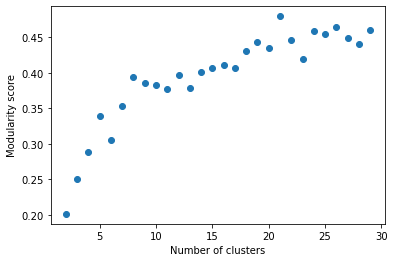

Link predictions: 0.05 :Accuracy: 0.5182969388772559
Link predictions: 0.1 :Accuracy: 0.5181559835806757
Link predictions: 0.2 :Accuracy: 0.5200710479573712
Link predictions: 0.3 :Accuracy: 0.5211096075778079
Link predictions: 0.4 :Accuracy: 0.5347331859804231
Link predictions: 0.5 :Accuracy: 0.5310723758999621
Link predictions: 0.6 :Accuracy: 0.5344541794932512
Link predictions: 0.7 :Accuracy: 0.5197347647616041
Link predictions: 0.8 :Accuracy: 0.5222537878787878
For p value as  {0.25}
Learning embedding vectors...
Learning embedding vectors done!
Training classifier using 5.00% nodes...
-------------------
{'acc': 0.372960372960373}
-------------------
Training classifier using 10.00% nodes...
-------------------
{'acc': 0.4593929450369155}
-------------------
Training classifier using 20.00% nodes...
-------------------
{'acc': 0.49169741697416974}
-------------------
Training classifier using 30.00% nodes...
-------------------
{'acc': 0.5421940928270043}
-------------------
Traini

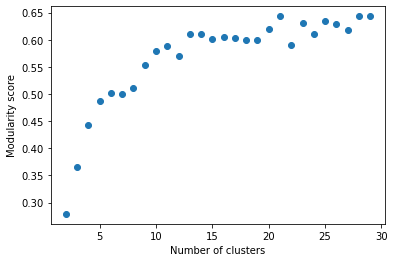

Link predictions: 0.05 :Accuracy: 0.5092232525675541
Link predictions: 0.1 :Accuracy: 0.5115251026207768
Link predictions: 0.2 :Accuracy: 0.5271758436944938
Link predictions: 0.3 :Accuracy: 0.5362652232746955
Link predictions: 0.4 :Accuracy: 0.541364066940322
Link predictions: 0.5 :Accuracy: 0.5342932929139825
Link predictions: 0.6 :Accuracy: 0.5309022022259058
Link predictions: 0.7 :Accuracy: 0.5449952636564572
Link predictions: 0.8 :Accuracy: 0.5449810606060606
For p value as  {0.5}
Learning embedding vectors...
Learning embedding vectors done!
Training classifier using 5.00% nodes...
-------------------
{'acc': 0.4257964257964258}
-------------------
Training classifier using 10.00% nodes...
-------------------
{'acc': 0.5430680885972108}
-------------------
Training classifier using 20.00% nodes...
-------------------
{'acc': 0.6143911439114391}
-------------------
Training classifier using 30.00% nodes...
-------------------
{'acc': 0.6666666666666666}
-------------------
Training

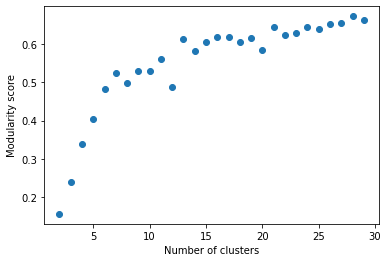

Link predictions: 0.05 :Accuracy: 0.5377405523980456
Link predictions: 0.1 :Accuracy: 0.5440479949479002
Link predictions: 0.2 :Accuracy: 0.548963883955003
Link predictions: 0.3 :Accuracy: 0.5522327469553451
Link predictions: 0.4 :Accuracy: 0.5513103883801705
Link predictions: 0.5 :Accuracy: 0.5558923834785904
Link predictions: 0.6 :Accuracy: 0.5541084537058962
Link predictions: 0.7 :Accuracy: 0.5569940006315125
Link predictions: 0.8 :Accuracy: 0.5672348484848485
For p value as  {1}
Learning embedding vectors...
Learning embedding vectors done!
Training classifier using 5.00% nodes...
-------------------
{'acc': 0.6379176379176379}
-------------------
Training classifier using 10.00% nodes...
-------------------
{'acc': 0.7038556193601313}
-------------------
Training classifier using 20.00% nodes...
-------------------
{'acc': 0.716789667896679}
-------------------
Training classifier using 30.00% nodes...
-------------------
{'acc': 0.75}
-------------------
Training classifier using

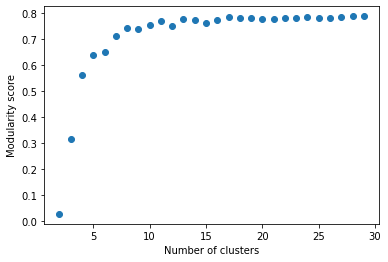

Link predictions: 0.05 :Accuracy: 0.5675540931299232
Link predictions: 0.1 :Accuracy: 0.5583622776549837
Link predictions: 0.2 :Accuracy: 0.5715808170515098
Link predictions: 0.3 :Accuracy: 0.5702300405953992
Link predictions: 0.4 :Accuracy: 0.5609409535838333
Link predictions: 0.5 :Accuracy: 0.5657446002273588
Link predictions: 0.6 :Accuracy: 0.5713947430736444
Link predictions: 0.7 :Accuracy: 0.5822544995263657
Link predictions: 0.8 :Accuracy: 0.5776515151515151


In [28]:

for i in [0.01, 0.1, 0.25, 0.5, 1]:
    print("For p value as ", {i})
    walks = perform_shortcut_walks(graph, walk_length=10, num_walks=80, p=i)
    embeddings_shortcut_walk = get_embedding(graph, walks)
    node_classification(embeddings_shortcut_walk, labelfile)
    cluster_eval(G1, embeddings_shortcut_walk)
    makeLinkPredictionData(G1, embeddings_shortcut_walk)
    

## Explain your observations for different values of p. For example, should we expect better accuracy with a small number of shortcuts?

Yes, we can expect better accuracy with a small number of shortcuts (small values of p) as it preserves the local structure of the network better, aiding in more accurate node classification and link prediction.